<a href="https://colab.research.google.com/github/roxacarv/edulearn/blob/main/Edulearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise Exploratória dos Dados

## Censo 2019 - Cursos

In [ ]:
import pandas as pd
df = pd.read_csv('sup_curso_219.csv', sep='|', encoding='latin-1', usecols= [1,2,3,5,9,20,21,22,23,24,25,26,27,28,29,30,31,32])
df

,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_UF,NO_CURSO,IN_AJUDA_DEFICIENTE,IN_MATERIAL_DIGITAL,IN_MATERIAL_AMPLIADO,IN_MATERIAL_TATIL,IN_MATERIAL_IMPRESSO,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA
0,1,1,1,51.0,DIREITO,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,1,1,51.0,CIÊNCIAS ECONÔMICAS,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,1,51.0,ENGENHARIA CIVIL,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,1,51.0,PEDAGOGIA,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,1,1,1,51.0,SERVIÇO SOCIAL,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40704,23713,2,3,33.0,SISTEMAS PARA INTERNET,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40705,23725,2,3,53.0,GESTÃO PÚBLICA,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40706,23867,2,3,35.0,GESTÃO DE RECURSOS HUMANOS,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
40707,24462,3,3,35.0,PROCESSOS QUÍMICOS,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Evolução de alunos matriculados

A partir dos dados existentes nas sinopses estatíticas (http://inep.gov.br/sinopses-estatisticas-da-educacao-superior)

In [3]:
import pandas as pd
total_matriculados = pd.read_csv('total_matriculados.csv')
total_matriculados

,ANO,MATRICULADOS
0,2011,23250
1,2012,27143
2,2013,29034
3,2014,33377
4,2015,37927
5,2016,35891
6,2017,38272
7,2018,43633
8,2019,48520


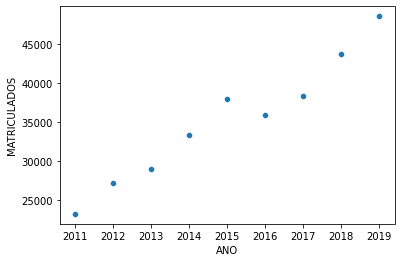

In [4]:
import seaborn as sns
evolucao = sns.scatterplot(x='ANO', y='MATRICULADOS', data=total_matriculados)